# Plotting Shuttle Radar Topography Mission

This example illustrates the automatic download of SRTM data, and adding of
shading to create a so-called "Shaded Relief SRTM".

Originally contributed by Thomas Lecocq (http://geophysique.be).

In [1]:
import cartopy.crs as ccrs
from cartopy.io import srtm
import matplotlib.pyplot as plt

from cartopy.io import PostprocessedRasterSource, LocatedImage
from cartopy.io.srtm import SRTM3Source, SRTM1Source

%matplotlib nbagg

def shade(located_elevations):
    """
    Given an array of elevations in a LocatedImage, add a relief (shadows) to
    give a realistic 3d appearance.

    """
    new_img = srtm.add_shading(located_elevations.image,
                               azimuth=135, altitude=15)
    
    return LocatedImage(new_img, located_elevations.extent)


def plot(Source, name):
    plt.figure()
    ax = plt.axes(projection=ccrs.PlateCarree())

    # Define a raster source which uses the SRTM data and applies the
    # shade function when the data is retrieved.
    shaded_srtm = PostprocessedRasterSource(Source(), shade)

    # Add the shaded SRTM source to our map with a grayscale colormap.
    ax.add_raster(shaded_srtm, cmap='Greys')

    # This data is high resolution, so pick a small area which has some
    # interesting orography.
    ax.set_extent([12, 13, 47, 48])

    plt.title(name + " Shaded Relief Map")

    gl = ax.gridlines(draw_labels=True)
    gl.xlabels_top = False
    gl.ylabels_left = False

<IPython.core.display.Javascript object>


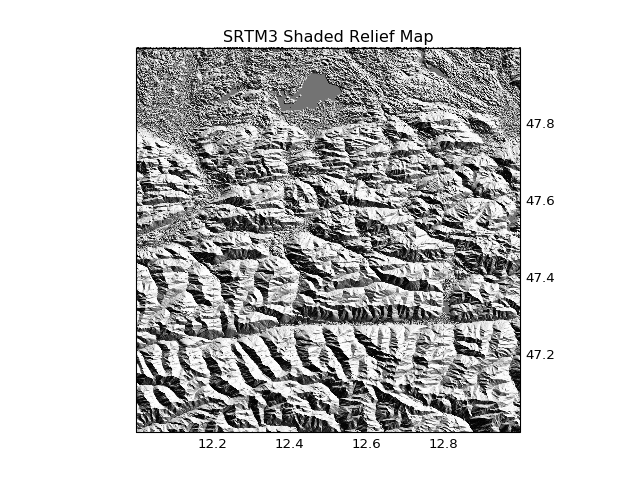

In [2]:
plot(SRTM3Source, 'SRTM3')

plt.show()

<IPython.core.display.Javascript object>


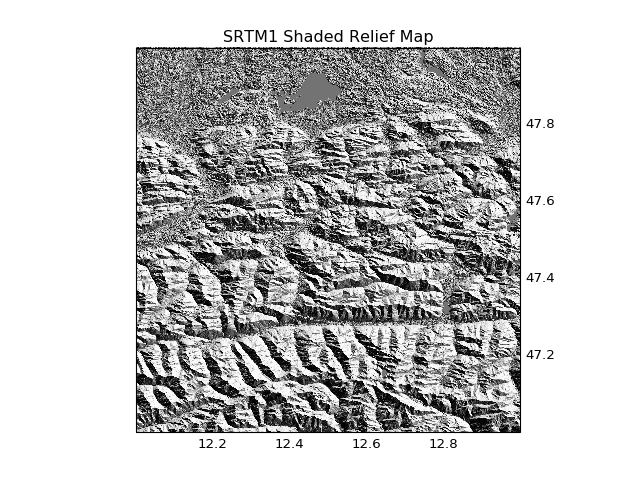

In [3]:
plot(SRTM1Source, 'SRTM1')

plt.show()